In [1]:
sys.path.insert(0, './common')

import sys
import wave
import ppo_unite

c:\Users\nathan\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
env_path = 'env01/Wave'

In [4]:
env = wave.WaveEnv(env_path, worker_id=70)

WAVE environment created.


In [5]:
# BEST PPO 
# hidden_layer = 1024
# ppo_epochs = 5
# clip = 0.2
# minibatch_size=128

hidden_layer = 512
ppo_epochs = 10
clip = 0.2
minibatch_size = 64
model = ppo_unite.PPO(127, 2, hidden_layer, minibatch_size=minibatch_size, ppo_epochs=ppo_epochs, clip=clip, lr=1e-4)

In [6]:
save_path = f'./results/env01/ppo/512-128-ppounite-normalize-complexlayers-nodecay-64batch'
model.set_model_save_path(save_path)

In [5]:
model.load_model()

Model loaded
Training history loaded


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


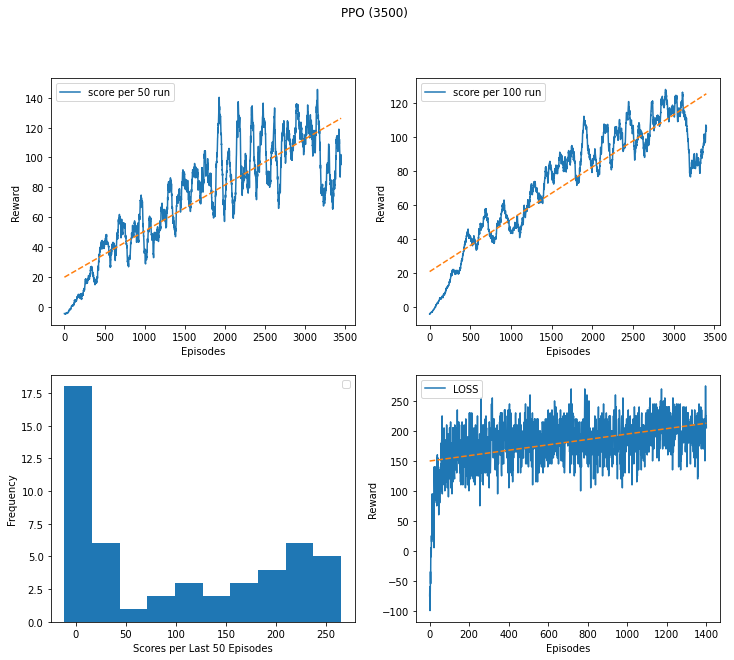

Model saved
Training history saved
saved to ./results/env01/ppo/512-128-ppounite-normalize-complexlayers-nodecay-64batch-3500
epoch: 3499, total timestep: 1401246, total reward: 244.999968662858, timestep: 1000, lr: 0.0001
epoch: 3500, total timestep: 1401440, total reward: 20.339994221925735, timestep: 194, lr: 0.0001
epoch: 3501, total timestep: 1401552, total reward: 9.429999098181725, timestep: 112, lr: 0.0001
epoch: 3502, total timestep: 1401652, total reward: 10.009998604655266, timestep: 100, lr: 0.0001
epoch: 3503, total timestep: 1402066, total reward: 84.32998697459698, timestep: 414, lr: 0.0001
epoch: 3504, total timestep: 1402390, total reward: 58.79999051988125, timestep: 324, lr: 0.0001
epoch: 3505, total timestep: 1402868, total reward: 76.10998833179474, timestep: 478, lr: 0.0001
epoch: 3506, total timestep: 1402917, total reward: -7.450000047683716, timestep: 49, lr: 0.0001
epoch: 3507, total timestep: 1403043, total reward: 23.729995220899582, timestep: 126, lr: 0.000

KeyboardInterrupt: 

In [7]:
# jalanin lagi dari 3500
model.set_train_params(max_step=1000, plot_smooth=50, gamma=0.99)
model.train(env, 5000, show_plot=True, lr_decay_interval=False)

In [7]:
model.save_model()

Model saved
Training history saved


In [ ]:
import saver
saver.save_wave_model(hidden_layer, f'{save_path}/actor.pth', f'{save_path}/model.onnx')

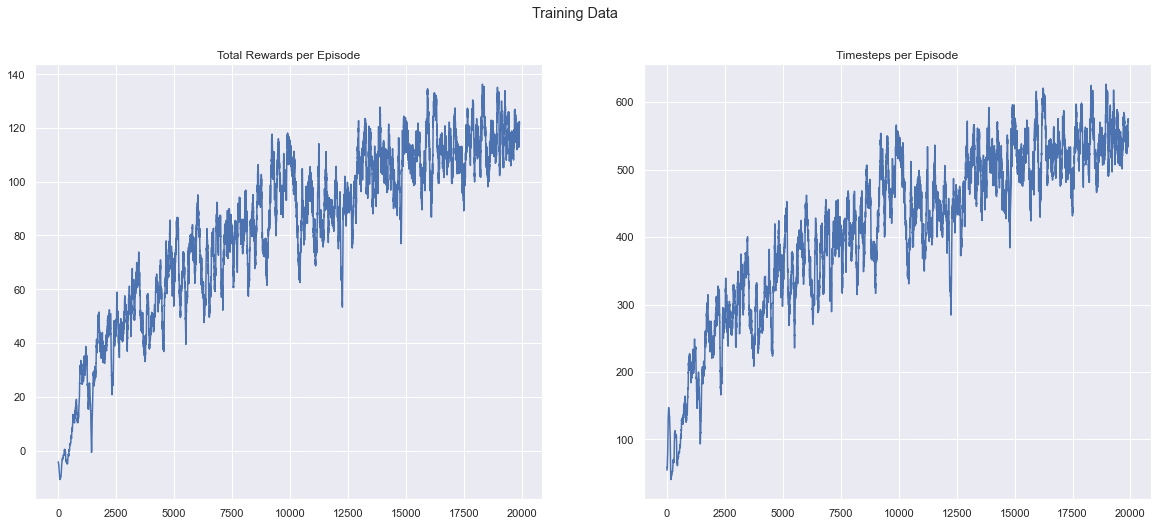

In [6]:
model.plot_train_memory(smooth=100)

In [8]:
env = wave.WaveEnv(env_path, 2, worker_id=1)
model.test(env)

WAVE environment created.


(300.309961527586, 1394)

In [7]:
model.test_avg(lambda time_scale: wave.WaveEnv(env_path, time_scale, worker_id=4), 100, 40)

WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environ

(134.37758179724216, 643.83)

In [4]:
env.close()